# Retirement Planner

---

## Environment Setup

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [2]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

---

## Portfolio Planner

In this activity, you will use the Alpaca API to grab historical data for a `60/40` portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()


# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [5]:
# Display sample data
df.head()

,AGG,SPY
,close,close
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


---

## Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:

1. Calculate the daily returns for the SPY and AGG closing prices.

2. Calculate volatility for both the SPY and AGG closing prices.

3. Find the last day's closing price for both stocks and save those as variables

4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

In [6]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change().dropna()

# Display sample data
daily_returns.head()

,AGG,SPY
,close,close
2019-01-03 00:00:00-05:00,0.004081,-0.021730
2019-01-04 00:00:00-05:00,-0.003037,0.032521
2019-01-07 00:00:00-05:00,-0.002109,0.007884
2019-01-08 00:00:00-05:00,-0.000470,0.008844
2019-01-09 00:00:00-05:00,0.000564,0.004130


In [7]:
daily_returns.index = daily_returns.index.date
daily_returns

,AGG,SPY
,close,close
2019-01-03,0.004081,-0.021730
2019-01-04,-0.003037,0.032521
2019-01-07,-0.002109,0.007884
2019-01-08,-0.000470,0.008844
2019-01-09,0.000564,0.004130
...,...,...
2019-12-24,0.001292,0.000125
2019-12-26,0.000934,0.005136
2019-12-27,0.001245,-0.000155


In [8]:
# Compute daily volatility
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg
std_dev_daily_return_spy 

0.007820053413439366

In [9]:
# Save the last day's closing price
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]
agg_last_price
spy_last_price 

321.92

In [10]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 30
monte_carlo_df=pd.DataFrame()

In [11]:
# Run the Monte Carlo Simulation


# Run the simulation of projecting stock prices for the next trading year, `500` times
for n in range(number_simulations):
    print(f"simulation{n}")
    # Initialize the simulated prices list with the last closing price of AGG and SPY
    simulated_agg_price = [agg_last_price]
    simulated_spy_price = [spy_last_price]

    
    # Simulate the returns for 252 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_agg_price.append(simulated_agg_price[-1] * (1 + np.random.normal(daily_returns.mean()['AGG']['close'],
                                                                                   std_dev_daily_return_agg)))
        simulated_spy_price.append(simulated_spy_price[-1] * (1 + np.random.normal(daily_returns.mean()['SPY']['close'], 
                                                                                   std_dev_daily_return_spy)))
        
    price_df=pd.DataFrame({
        "AGG prices":simulated_agg_price,
        "SPY prices":simulated_spy_price
    })
    
    simulated_daily_returns = price_df.pct_change().dropna()
    simulated_daily_returns = .6 * simulated_daily_returns["SPY prices"] + .4 * simulated_daily_returns["AGG prices"]
    monte_carlo_df[n] = (1 + simulated_daily_returns.fillna(0)).cumprod()


simulation0
simulation1
simulation2
simulation3
simulation4
simulation5
simulation6
simulation7
simulation8
simulation9
simulation10
simulation11
simulation12
simulation13
simulation14
simulation15
simulation16
simulation17
simulation18
simulation19
simulation20
simulation21
simulation22
simulation23
simulation24
simulation25
simulation26
simulation27
simulation28
simulation29
simulation30
simulation31
simulation32
simulation33
simulation34
simulation35
simulation36
simulation37
simulation38
simulation39
simulation40
simulation41
simulation42
simulation43
simulation44
simulation45
simulation46
simulation47
simulation48
simulation49
simulation50
simulation51
simulation52
simulation53
simulation54
simulation55
simulation56
simulation57
simulation58
simulation59
simulation60
simulation61
simulation62
simulation63
simulation64
simulation65
simulation66
simulation67
simulation68
simulation69
simulation70
simulation71
simulation72
simulation73
simulation74
simulation75
simulation76
simulatio

In [12]:
# Print head of DataFrame
monte_carlo_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,1.000476,1.000536,0.998808,1.005394,1.011797,0.994452,0.997251,1.013277,1.000869,0.995376,...,1.011448,0.998782,0.996388,1.004907,1.002212,0.998372,1.005269,1.008571,0.999745,1.004380
2,1.008876,1.004699,1.003590,0.996711,1.009571,0.994247,0.994214,1.007199,1.000225,0.993036,...,1.013402,0.999055,0.996043,1.000145,0.995961,1.003225,1.002277,1.005187,0.994018,1.008494
3,1.008286,1.004228,1.003770,0.998232,1.007751,0.987669,0.998229,1.001361,1.000230,1.001279,...,1.020818,1.000116,0.993744,1.002906,0.993040,1.001153,0.995290,1.004921,0.996955,1.008025
4,1.013963,1.006575,1.008493,1.002636,1.013664,0.990972,1.003241,0.995491,1.002048,1.006036,...,1.024352,0.997842,0.995994,1.002343,0.996733,1.002187,0.996472,1.001291,0.999373,1.006253
5,1.016865,0.999694,1.001493,1.016174,1.011404,0.989529,1.007597,0.997137,1.010585,1.001112,...,1.022603,1.005889,0.994097,1.010824,1.006277,1.005564,0.990288,1.007882,1.005581,1.004593


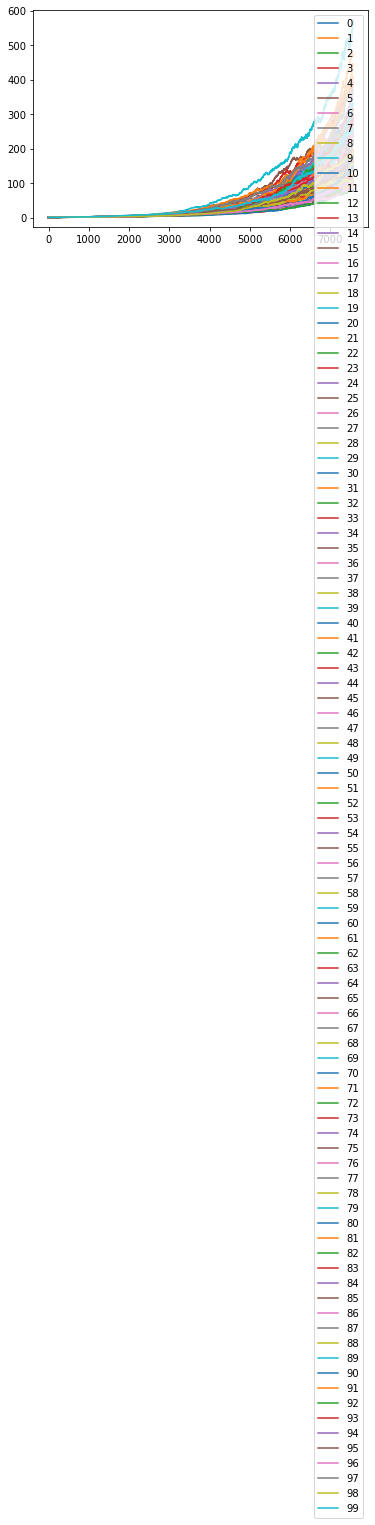

In [13]:
# Visualize the Simulation
monte_carlo_df.plot()

In [14]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
simulated_ending_prices = monte_carlo_df.iloc[-1, :]
simulated_ending_prices.head()

0    192.773859
1    171.964137
2    177.998514
3    138.466715
4    175.628015
Name: 7560, dtype: float64

In [15]:
# Display the 90% confidence interval for the ending returns
confidence_interval = simulated_ending_prices.quantile(q=[0.020, 0.980])
confidence_interval



0.02     84.014473
0.98    446.811067
Name: 7560, dtype: float64

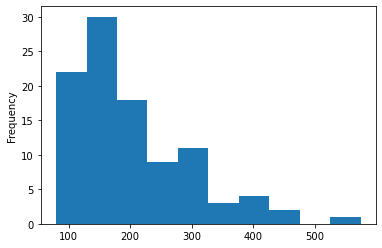

In [16]:
# Visualize the distribution of the ending returns
simulated_ending_prices.plot.hist()

---

## Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at `30` years for the `10th`, `50th`, and `90th` percentiles?

2. Given an initial investment of `$20,000`, what is the expected return in dollars at the `10th`, `50th`, and `90th` percentiles?

3. Given the current projected annual income from the Plaid analysis, will a `4%` withdrawal rate meet or exceed that value at the `10th` percentile? Note: This is basically determining if retirement income is equivalent to current income.

4. How would a `50%` increase in the initial investment amount affect the `4%` retirement withdrawal? In other words, what happens if the initial investment had been bigger?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [17]:
# Compute cumulative returns

simulated_ending_prices.quantile([.10,.5, .90])




0.1    102.823611
0.5    177.378187
0.9    321.750219
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [18]:
# Set initial investment
initial_investment = 20000

# Compute expected portfolio return

initial_investment * simulated_ending_prices.quantile([.10,.5,.90])


0.1    2.056472e+06
0.5    3.547564e+06
0.9    6.435004e+06
Name: 7560, dtype: float64

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [19]:
# Set Plaid's projected income
plaid_projected_income = 7389

# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income = initial_investment * simulated_ending_prices.quantile(.10) * .04


# Determine if the retirement income meets or exceeds the current projected income
plaid_projected_income > retirement_income

False

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [21]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
retirement_incomev2 = initial_investment * simulated_ending_prices.quantile(.5) * .04

plaid_projected_income > retirement_income

False

### Optional Challenge

Use the Monte Carlo data and calculate the cumulative returns at the `5%`, `50%`, and `95%` quartiles and plot this data as a line chart to see how the cumulative returns change over the life of the investment.

In this section, you need to calculate and plot the cumulative returns for the median and `90%` confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# Compute projected returns

# Display sample data


In [ ]:
# Plot the cumulative returns over time


In [ ]:
# Compute portfolio performance over time

# Plot projected performance over time
